# Decsion Tree Analysis
Imports and feature selection

In [4]:
from data_cleaning import ratings_df, watchlist_df, valid_int
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor






# Model Training

In [5]:
X = ratings_df[["IMDb Rating", "Runtime (mins)", "Year", "Num Votes", "Day_Rated"]] 
y = ratings_df['Your Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth = 3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

## Model Evaluation

In [6]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Model 1) \nMean Absolute Error: {round(mae, 3)}')
train_score = model.score(X_train, y_train)
print(f'Training R-squared: {round(train_score, 3)}')
test_score = model.score(X_test, y_test)
print(f'Test R-squared: {round(test_score, 3)}', '\n')

print('Model 2) \nMean Absolute Error: 0.927 ') #todo: Change this to whatever is needed!!
print('Test R-squared: 0.298')
print('Training R-squared: 0.263', '\n')
print("Despite model 2 demonstrating better point-wise accuracy with lower MAE, \nI would chose model 1 due to it's superior overall explanatory power reflected in higher R-sqaured scores ")
# print(model.coef_)
# print(model.intercept_) 

Model 1) 
Mean Absolute Error: 0.971
Training R-squared: 0.322
Test R-squared: 0.208 

Model 2) 
Mean Absolute Error: 0.927 
Test R-squared: 0.298
Training R-squared: 0.263 

Despite model 2 demonstrating better point-wise accuracy with lower MAE, 
I would chose model 1 due to it's superior overall explanatory power reflected in higher R-sqaured scores 


## Keep this tree showing - for the moment..

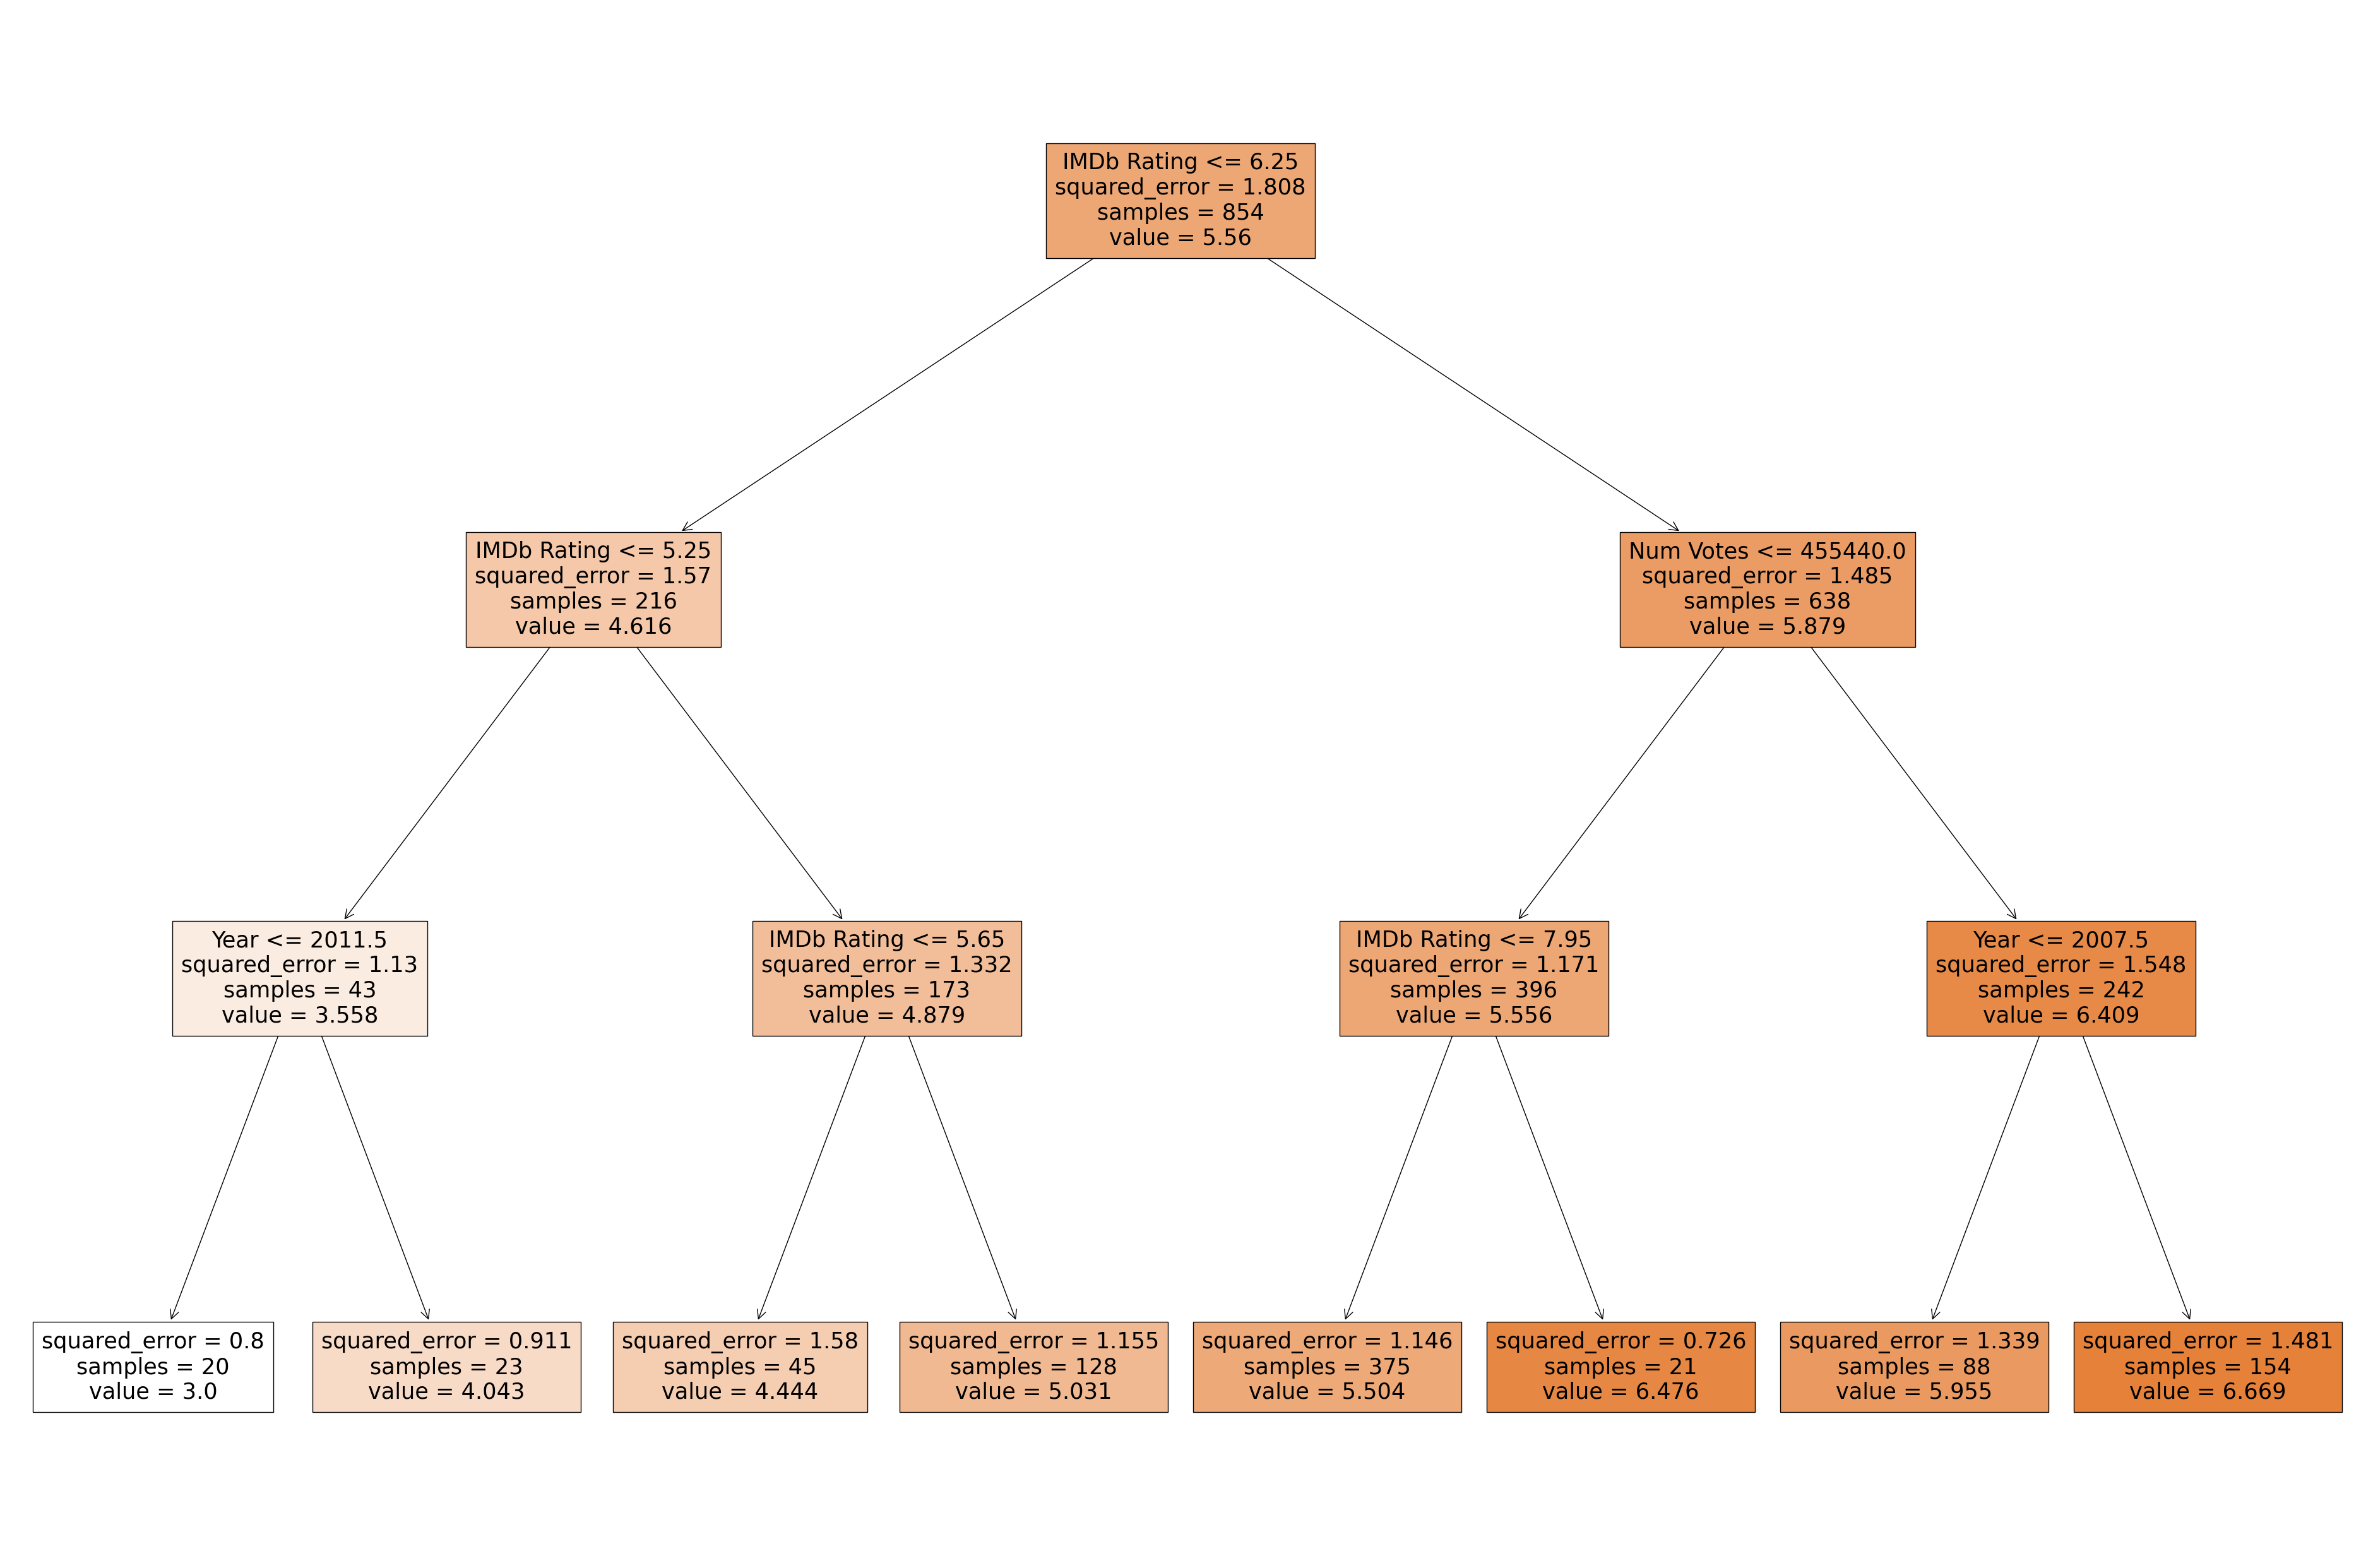

|--- feature_0 <= 6.25
|   |--- feature_0 <= 5.25
|   |   |--- feature_2 <= 2011.50
|   |   |   |--- value: [3.00]
|   |   |--- feature_2 >  2011.50
|   |   |   |--- value: [4.04]
|   |--- feature_0 >  5.25
|   |   |--- feature_0 <= 5.65
|   |   |   |--- value: [4.44]
|   |   |--- feature_0 >  5.65
|   |   |   |--- value: [5.03]
|--- feature_0 >  6.25
|   |--- feature_3 <= 455440.00
|   |   |--- feature_0 <= 7.95
|   |   |   |--- value: [5.50]
|   |   |--- feature_0 >  7.95
|   |   |   |--- value: [6.48]
|   |--- feature_3 >  455440.00
|   |   |--- feature_2 <= 2007.50
|   |   |   |--- value: [5.95]
|   |   |--- feature_2 >  2007.50
|   |   |   |--- value: [6.67]



In [7]:

#* Ideally would like to plot the tree here as well..
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 32)) #* Make this bigger than it becomes more readable!
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

# CAn do something like this ehh 
#! You can see that that first plot is madness and gives no indication of what's happening so let's try visualise with diff max depths

#? Or gross code visualization 
print(tree.export_text(model))

## Predictions on Watchlist

In [8]:
#! Making sure the predictions df lines up with ratings_df
watchlist_df2 = watchlist_df.drop("Title", axis=1).copy()
watchlist_df2 = watchlist_df2[["IMDb Rating", "Runtime (mins)", "Year", "Num Votes", "Day_Rated"]]

# Predictions
predictions = np.round(model.predict(watchlist_df2), 1) # Rounded to make it a closer resemblence to acutal IMDb Ratings..

pred_titles = list(zip(watchlist_df['Title'], predictions))
sorted_predictions = sorted(pred_titles, key=lambda x: x[1], reverse=True)

for title, rating in sorted_predictions:
    print(f'{title}: {rating}')

La La Land: 6.7
Whiplash: 6.7
Rogue One: 6.7
Everything Everywhere All at Once: 6.7
Euphoria: 6.5
The Departed: 6.0
American Reunion: 5.5
Under the Skin: 5.5
Match Point: 5.5
Ride Like a Girl: 5.5
Midsommar: 5.5
The Machinist: 5.5
Magnus: 5.5
The Man Who Knew Infinity: 5.5
The Edge of Seventeen: 5.5
The Game: 5.5
The Life of David Gale: 5.5
The Town: 5.5
Don't Worry Darling: 5.5
Triple Frontier: 5.5
Pawn Sacrifice: 5.5
Absolutely Anything: 5.0
Don't Breathe 2: 5.0
Something Borrowed: 5.0
The Place of No Words: 4.4


## User Input Predictions

In [9]:
# Some movies that you can try:
# The Godfather, 9.2, 175, 1972, 2000000
# Napoleon, 6.5, 158, 2023, 95000
# Frozen 2, 6.8, 103, 2019, 191000

def user_predict():
    movie_title = input("Enter the name of the movie/ tv show you would like rated: ")
    imdb_rating = valid_int("Enter the IMDb rating: ", 0, 10)
    runtime = valid_int("Enter the runtime in minutes: ", 0, 250)
    year = valid_int("Enter the year of release: ", 1888, 2024)
    num_votes = valid_int("Enter the number of votes on Imdb: ", 0, 2134288)

    new_data = pd.DataFrame({
        'IMDb Rating': [imdb_rating],
        'Runtime (mins)': [runtime],
        'Year': [year],
        'Num Votes': [num_votes],
        'Day_Rated': [3487] # defaulted as present day : 26/1/24
    })

    predicted_rating = np.round(model.predict(new_data),1)
    print(f'\nPredicted rating for {movie_title}: {predicted_rating[0]}')

#! user_predict() --------- UNCOMMENT this line to use the predicter function

## Visulisation of Predicted vs Actual Rating

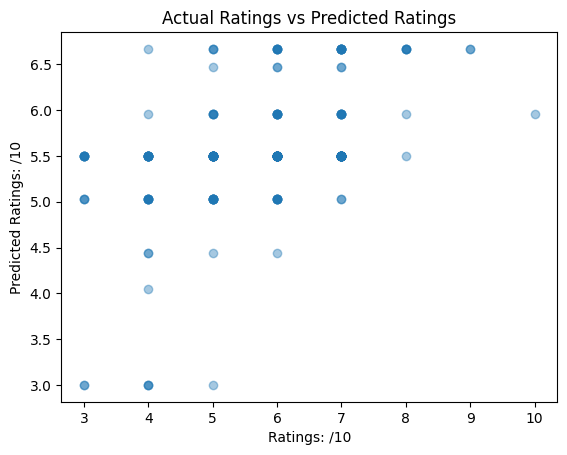

In [10]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Ratings: /10")
plt.ylabel("Predicted Ratings: /10")
plt.title("Actual Ratings vs Predicted Ratings")
plt.show() 

In [11]:

#? Let's work out down here like we did with K-Nearest Neighbors, what the best depth is by looping through all the depths!
# First set max_depth = None or leave as default than work out what the max is to loop to!


